# **Ejercicio 1**: Hacer un análisis exploratorio de algunas las variables incluídas en los dos datasets provistos.

Inicializamos las bibliotecas:

In [27]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

Abrimos un dataset y lo visualizamos:

In [28]:
datas = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv', header=0, sep=",")
print(datas.shape)
print(datas)

(88, 11)
         fecha  confirmados  ...  aislamiento_por_contacto_estrecho  aprehendidos
0   2020-06-30          106  ...                                181             0
1   2020-07-01          114  ...                                172             0
2   2020-07-02          124  ...                                176             0
3   2020-07-03          137  ...                                190             0
4   2020-07-04          154  ...                                214             0
..         ...          ...  ...                                ...           ...
83  2020-09-21         2589  ...                                510             0
84  2020-09-22         2714  ...                                554             0
85  2020-09-23         2841  ...                                562             0
86  2020-09-24         2906  ...                                562             0
87  2020-09-25         3012  ...                                625             0

[88 ro

Calculamos variables estadísticas básicas (media, desvío estandar, etc):

In [29]:
print(datas.describe())

       confirmados  ...  aprehendidos
count    88.000000  ...          88.0
mean    944.977273  ...           0.0
std     741.951512  ...           0.0
min     106.000000  ...           0.0
25%     422.000000  ...           0.0
50%     706.500000  ...           0.0
75%    1262.750000  ...           0.0
max    3012.000000  ...           0.0

[8 rows x 10 columns]


Graficamos el histograma y boxplot de distintas variables del dataset para poder hacer un análisis visual de la información contenida:

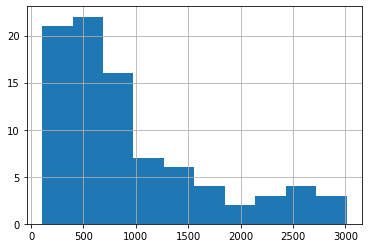

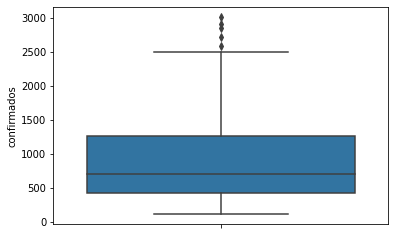

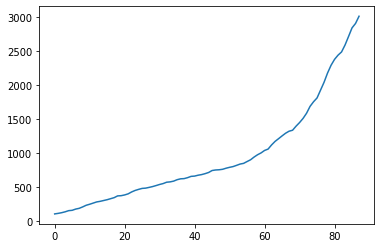

In [30]:
graf1=datas['confirmados'].hist()
plt.show(graf1)
graf2=sns.boxplot(y=datas['confirmados'])
plt.show(graf2)
graf3=datas['confirmados'].plot()
plt.show(graf3)

### Respuestas sobre el primer dataset:


*   Las observaciones del dataset son acumulativas por lo que para facilitar el análisis habría que obtener el conteo diario de las distintas variables/atributos.
*   No se puede determinar directamente si la distribución de las observaciones es normal o Gaussiana debido al caracter acumulativo, y aún obteniendo el conteo diario no cumplen con algunas condiciones básicas como pueden ser:
    *   Ser simétricas respecto a la media.
    *   Tener el máximo en la media.
    *   Crece hasta la media y decrece a partir de ella.

### Repuestas sobre el segundo dataset:

Hacemos el mismo análisis exploratorio con el segundo dataset, en este caso la toma de datos/observaciones no son acumulativas.

*   En el caso de la variable "total_camas_hospitales" las observaciones se mantienen relativamente constantes en el tiempo, aunque ciertas observaciones figuran en cero. 
*   Las variables "camas_sospechosos_covid" y "respiradores_ocupados" son las que presentan una distribución más parecida a la normal o Gaussiana.
*   A partir de cierta fecha no contamos con datos de las variables "respiradores_covid_totales" y "respiradores_covid_ocupados".

# **Ejercicio 2:** Generar un dataset con dos conjuntos Gaussianos (con diferente media y desvío estandar). Encontrar el umbral de clasificación por mínimo error usando la curva ROC y evaluar parámetros de calidad del clasificador.

Inicializamos las bibliotecas:

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importamos las herramientas de la biblioteca de scikit learn para generar nuestra curva ROC.

In [32]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Creamos 2 conjuntos de datos que sigan una distribución Gaussiana con 50 muestras cada uno, distinta media y desvío.

(50, 2)


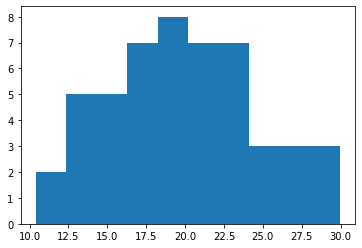

(50, 2)


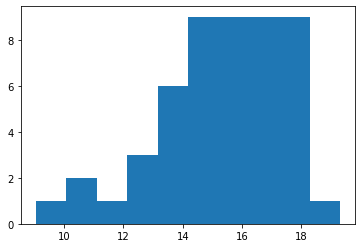

count    100.000000
mean      17.622266
std        4.386096
min        9.041947
25%       14.442054
50%       16.959862
75%       20.068195
max       29.970435
Name: var, dtype: float64

In [33]:
med1,des1,size1=(20,5,50) #media, desvío y n del primer muestreo
d1=np.random.normal(med1,des1,size1)
a=pd.DataFrame((d1),columns=['var'])
a['clase']=0
print(a.shape)
graf1=plt.hist(d1)
plt.show(graf1)

med2,des2,size2=(15,2,50) #media, desvío y n del segundo muestreo
d2=np.random.normal(med2,des2,size2)
b=pd.DataFrame((d2),columns=['var'])
b['clase']=1
print(b.shape)
graf2=plt.hist(d2)
plt.show(graf2)

dataf=pd.concat([a,b])
dataf['var'].describe()

Generamos nuestros sets de entrenamiento y testeo para usar luego en la clasificación.

In [34]:
print(dataf)

dat = dataf.drop(columns='clase')
clase = dataf['clase']

train_dat, test_dat, train_clase, test_clase=train_test_split(dat, clase, test_size=0.5)
print(train_dat.shape)
print(train_clase.shape)
print(test_clase.shape)

          var  clase
0   20.838908      0
1   15.823772      0
2   29.970435      0
3   26.970123      0
4   13.439540      0
..        ...    ...
45  12.352005      1
46  15.620548      1
47  17.041957      1
48  16.084610      1
49  14.403953      1

[100 rows x 2 columns]
(50, 1)
(50,)
(50,)


Generamos una curva de clasificación aleatoria.

In [35]:
aleat = [0 for _ in range(len(test_clase))]
print(aleat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Aplicamos un método de clasificación mediante regresión logística a nuestro dataset.

In [36]:
model=LogisticRegression(solver='lbfgs')
model.fit(train_dat,train_clase)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predecimos las probabilidades de las dos clases.

In [37]:
log_reg = model.predict_proba(test_dat)
print(log_reg.shape)
#print(log_reg)

(50, 2)


Del total predicho nos quedamos unicamente con los resultados positivos.

In [38]:
log_reg_pos = log_reg[:,1]
print(log_reg_pos.shape)

(50,)


Calculamos los resultados del AUC (área bajo la curva) para la regresión logística y la clasificación aleatoria:

In [39]:
aleat_auc = roc_auc_score(test_clase, aleat)
log_reg_auc = roc_auc_score(test_clase,log_reg_pos)
print('Aleatoria: ROC AUC=',(aleat_auc))
print('Logística: ROC AUC=',(log_reg_auc))

Aleatoria: ROC AUC= 0.5
Logística: ROC AUC= 0.8472906403940887


Calculamos la curva ROC y alguno de los parámetros de calidad del clasificador:

In [40]:
aleat_fpr, aleat_tpr, _ = roc_curve(test_clase, aleat)
log_reg_fpr, log_reg_tpr, _ = roc_curve(test_clase, log_reg_pos)

Graficamos la curva ROC correspondiente al ejemplo desarrollado

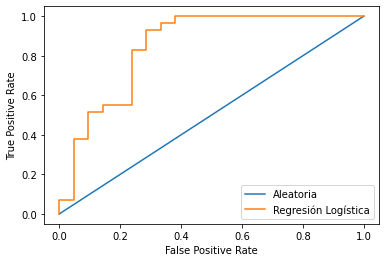

In [41]:
plt.plot(aleat_fpr, aleat_tpr, label="Aleatoria")
plt.plot(log_reg_fpr, log_reg_tpr, label="Regresión Logística")
plt.xlabel("False Positive Rate") #Agregamos el nombre al eje X
plt.ylabel("True Positive Rate")  #Agregamos el nombre al eje Y
plt.legend()  #Agregamos las referencias
plt.show()  #Mostramos el gráfico completo

Evaluamos la performance de nuestro modelo de clasificación a través de distintos parámetros.

In [42]:
pred = model.predict(test_dat)
acc = metrics.accuracy_score(test_clase,pred)
prec = metrics.precision_score(test_clase,pred)
f_mes = metrics.f1_score(test_clase,pred)

print('La exactitud del modelo fue:',acc)
print('La precisión del modelo fue:',prec)
print('El valor de f-measure fue:',f_mes)

La exactitud del modelo fue: 0.7
La precisión del modelo fue: 0.7916666666666666
El valor de f-measure fue: 0.7169811320754716


Generamos la matriz de confusión para visualizar los resultados del clasificador, para ello primero debemos importar la función correspondiente de scikit learn.

[[16  5]
 [10 19]]


Text(0.5, 257.44, 'Clase Predicha')

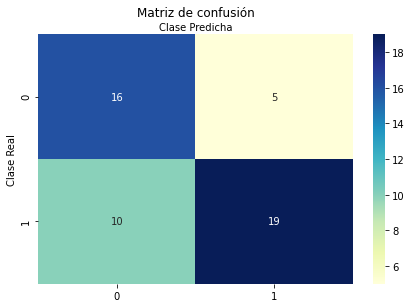

In [43]:
from sklearn.metrics import confusion_matrix

cf_mtx = metrics.confusion_matrix(test_clase,pred)   #calculo de la matriz
print(cf_mtx)

clases=[0,1]    #Graficamos la matriz de confusión
fig,ax = plt.subplots()
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')